# Logistic Regression
- Surviving the Titanic

- Suppose, you have to build a model to predict how many people survived the Titanic shipwrek

*We have details like
1. ID
2. Survived
3. Class
4. Name
5. Sex
6. Age
7. Siblings
8. Parents/children abroad
9. Ticket
10. Fare
etc....,


- Teaching the model with the passenger dataset

- Dropping the non-essential components of the dataset

- Determining the survival of passengers and evaluating the model

### What is Logistic Regression

- Probability can be between 0-1(No/Yes
- Threshold must be set
- Above 0.5 can be 1
- Below 0.5 can be 0
- Data are discrete in nature

### The math behing Logistic Regression
- To understand Logistic Regression,let's see the odds of success

$$ Odds (\theta) = \frac{Probability\; of\; an\; event\; happening}{Probability\; of\; an\; event\; not\;happening} $$

$$Or$$

$$ Odds (\theta) = \frac{P}{1 - P}$$

- $The\; values\; of\; odds\; range\; from\;  0-\infty$

- $The\; values\; of\; probability\; changes\; from\;  0-1$


- $The\; equation\; of\; straight\; line\; would\;be\;  y=\beta_0 + \beta_1x$


### Now, we predict the odds of success
$$\log\bigg(\frac{P(x)}{1 - P(x)}\bigg) = \beta_0 + \beta_1x$$

### Exponentiating both sides:
$$  \normalsize e^{ln}\bigg(\frac{P(x)}{1 - P(x)}\bigg) = e^{\beta_0 + \beta_1x} $$

$$\bigg(\frac{P(x)}{1 - P(x)}\bigg) = e^{\beta_0 + \beta_1x}$$


#### $$ \large Let\;Y=e^{\beta_0 + \beta_1x} $$

$$ Then\;\bigg(\frac{P(x)}{1 - P(x)}\bigg)=Y$$

$$p(x) = Y\big(1-p(x)\big)$$

$$p(x) = Y-Y\big(p(x)\big)$$

$$p(x)+Y\big(p(x)\big)=Y$$

$$p(x)(1+Y)=Y$$

$$ p(x)=\frac{Y}{1+Y}$$

$$\large p(x)=\frac{e^{\beta_0 + \beta_1x}} {1+e^{\beta_0 + \beta_1x}}$$

### The equation of a sigmoid function:
$$\large p(x)=\frac{e^{\beta_0 + \beta_1x}} {1+e^{\beta_0 + \beta_1x}}$$

$$\large p(x)= \frac{1} {{1+e^{-(\beta_0 + \beta_1x)}}}$$

In [24]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [25]:
digits=load_digits()

In [26]:
print("Image Data Shape",digits.data.shape)
print("Label Data Shape",digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


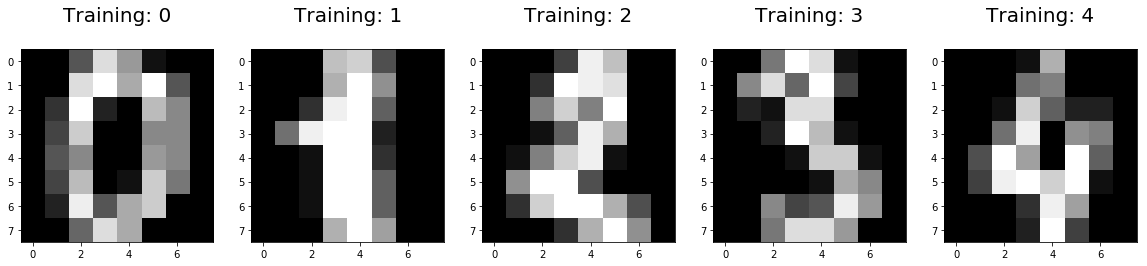

In [27]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate (zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label,fontsize=20)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [29]:
print("x_train.shape",x_train.shape)
print("y_train.shape",y_train.shape)
print("x_test.shape",x_test.shape)
print("y_test.shape",y_test.shape)

x_train.shape (1383, 64)
y_train.shape (1383,)
x_test.shape (414, 64)
y_test.shape (414,)


In [30]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
#Predicting the output of the first element of the test set
print(LR.predict(x_test[2].reshape(1,-1)))

[9]


In [39]:
#Predicting the output of the first 10 element of the test set
print(LR.predict(x_test[0:10]))

[4 0 9 1 8 7 1 5 1 6]


In [40]:
#Predictions for the entire set
predictions = LR.predict(x_test)

In [42]:
#Determining the accuracy
score=LR.score(x_test,y_test)
print(score*100)

94.20289855072464


In [46]:
cm = metrics.confusion_matrix(y_test,predictions)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


Text(0.5, 1.0, 'Accuracy score: 0.9420289855072463')

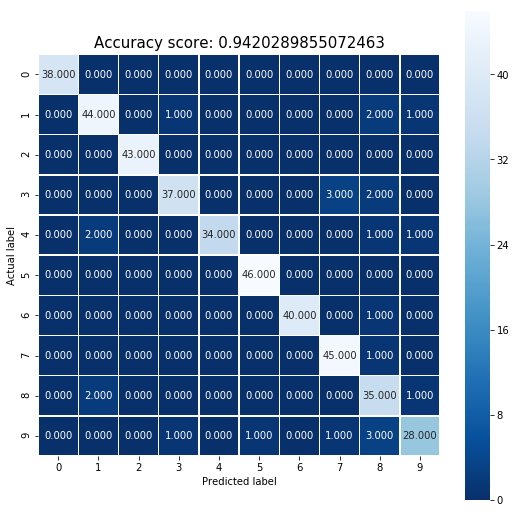

In [47]:
#Representing the confusion matrix in heatmap
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='.3f',linewidth=.5,square=True,cmap='Blues_r')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}" .format(score)
plt.title(all_sample_title,size=15)

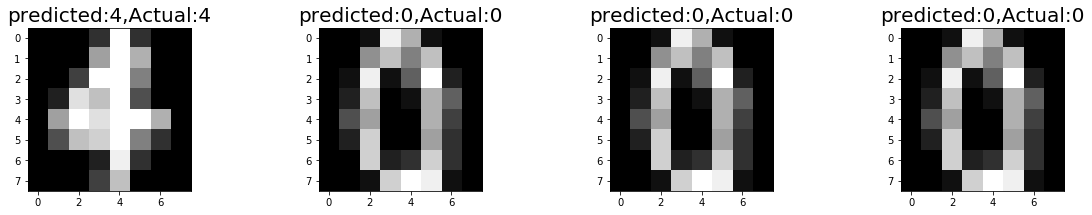

In [49]:
index = 0
classifiedIndex=[]
for predict,actual in zip(predictions,y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index=+1
plt.figure(figsize=(20,3))
for plotIndex,wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("predicted:{},Actual:{}".format(predictions[wrong],y_test[wrong]),fontsize=20)